In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def createNoise(n):
    r = np.random.normal(0,1,pow(n,2))
    maxr = max(r)
    minr = min(r)
    rnorm = [(i-minr)/(maxr-minr) for i in r]
    noise = [[255*rnorm[(j-1)*n+i] for j in range(n)] for i in range(n)]
    return noise

def vgBool(x,i,j):
	if abs(i-j)<=1:
		return True
	v = [x[i]+(k-i)/(j-i)*(x[j]-x[i])-x[k] for k in range(min(i,j)+1,max(i,j))]
	return pow(2,(sum(np.sign(v))-len(v)))==1

def boole(M,i_1,j_1,i_2,j_2):
	if (i_1-i_2)==0:
		return vgBool(M[i_1][min(j_1,j_2):max(j_1,j_2)+1],0,abs(j_2-j_1))
	if (j_1-j_2)==0:
		return vgBool([M[i][j_1] for i in range(min(i_1,i_2),max(i_1,i_2)+1)],0,abs(i_2-i_1))
	if abs(i_1-i_2)==abs(j_1-j_2):
		[dirx,diry] = [-int((i_1-i_2)/abs(i_1-i_2)),-int((j_1-j_2)/abs(i_1-i_2))]
		return vgBool([M[i_1+k*dirx][j_1+k*diry] for k in range(abs(i_1-i_2)+1)],0,abs(i_2-i_1))
	return False

def weightMat(M):
	return [[sum([sum([[ boole(M,i,j,k,l) for i in range(n)] for j in range(n)][t]) for t in range(n)])for l in range(n)] for k in range(n)]

def hWeightMat(M):
	return [[sum([boole(M,i,k,i,j) for k in range(n)]) for j in range(n)] for i in range(n)]

def vWeightMat(M):
	return [[sum([boole(M,k,j,i,j) for k in range(n)]) for j in range(n)] for i in range(n)]

def addNoise(image,noise,coeff):
	return [[(1-coeff)*z+coeff*w for (z,w) in zip(x,y)] for (x, y) in zip(image,noise)]

In [4]:
boatIm = Image.open('boat.png')
boat = np.array(boatIm).tolist()

n = len(boat)

noise = createNoise(n)

noiseCoeff = 0.5
boatNoise = addNoise(boat,noise,noiseCoeff)

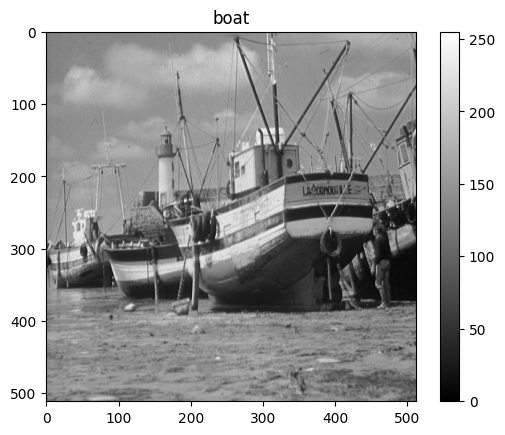

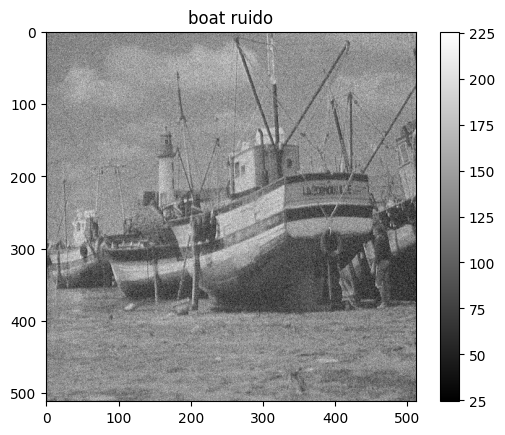

In [5]:
plt.imshow(boat, cmap='gray')
plt.title('boat')
plt.colorbar()
plt.show()
plt.imshow(boatNoise, cmap='gray')
plt.title('boat ruido')
plt.colorbar()
plt.show()

In [3]:
piDeg = weightMat(pi)
piNoiseDeg = weightMat(piNoise)
hPiNoiseDeg = hWeightMat(piNoise)
vPiNoiseDeg = vWeightMat(piNoise)
aux = [[z-w for (z,w) in zip(x,y)] for (x, y) in zip(piNoiseDeg,hPiNoiseDeg)]
test = [[z-w for (z,w) in zip(x,y)] for (x, y) in zip(aux,vPiNoiseDeg)]

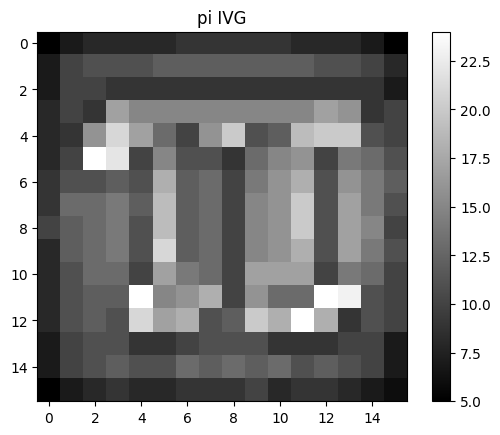

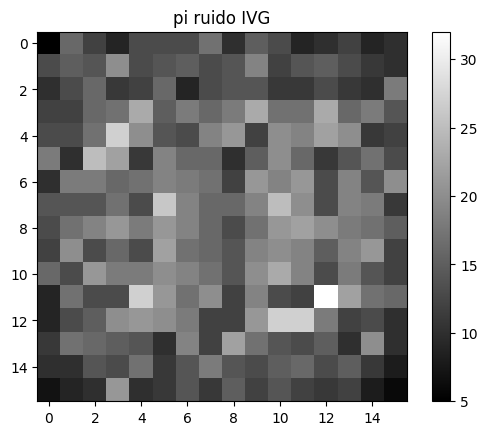

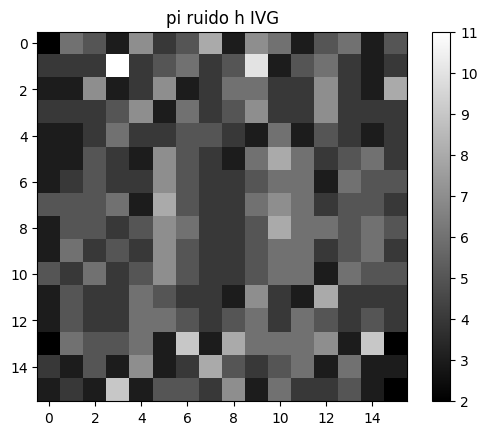

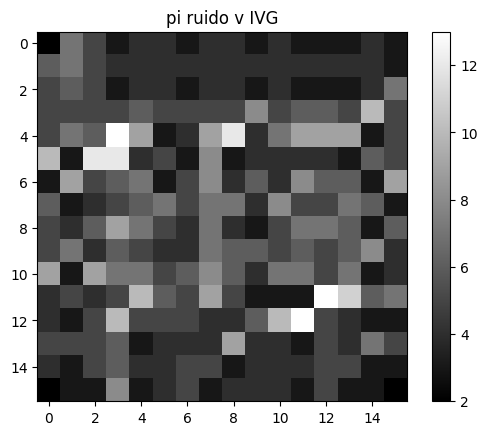

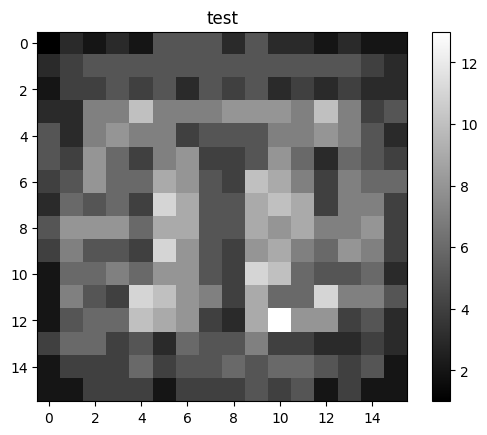

In [4]:
plt.imshow(piDeg, cmap='gray')
plt.title('pi IVG')
plt.colorbar()
plt.show()
plt.imshow(piNoiseDeg, cmap='gray')
plt.title('pi ruido IVG')
plt.colorbar()
plt.show()
plt.imshow(hPiNoiseDeg, cmap='gray')
plt.title('pi ruido h IVG')
plt.colorbar()
plt.show()
plt.imshow(vPiNoiseDeg, cmap='gray')
plt.title('pi ruido v IVG')
plt.colorbar()
plt.show()
plt.imshow(test, cmap='gray')
plt.title('test')
plt.colorbar()
plt.show()

In [ ]:
# histogramas
# más imagenes
# diagonales
# comparar ivg:
# ·ruido blanco
# ·imagenes sin ruido
# ·imagenes con ruido